In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns

In [ ]:
df = pd.read_csv('titanic_train.csv')
display(df)
print("Data Shape:", df.shape)
print("Data Keys:\n", df.keys())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest
0,3,0,"Stoytcheff, Mr. Ilia",male,19,0,0,349205,7.8958,?,S,?,?,?
1,3,0,"Kink, Mr. Vincenz",male,26,2,0,315151,8.6625,?,S,?,?,?
2,3,0,"Sivic, Mr. Husein",male,40,0,0,349251,7.8958,?,S,?,?,?
3,2,1,"Brown, Miss. Edith Eileen",female,15,0,2,29750,39,?,S,14,?,"Cape Town, South Africa / Seattle, WA"
4,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,?,1,0,17453,89.1042,C92,C,5,?,"Paris, France / New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60,1,1,13567,79.2,B41,C,5,?,"Zurich, Switzerland"
1043,2,1,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26,?,S,12,?,"Deer Lodge, MT"
1044,3,0,"Plotcharsky, Mr. Vasil",male,?,0,0,349227,7.8958,?,S,?,?,?
1045,3,0,"Canavan, Mr. Patrick",male,21,0,0,364858,7.75,?,Q,?,?,"Ireland Philadelphia, PA"


Data Shape: (1047, 14)
Data Keys:
 Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'homedest'],
      dtype='object')


In [ ]:
df["age"]

0       19
1       26
2       40
3       15
4        ?
        ..
1042    60
1043    25
1044     ?
1045    21
1046     ?
Name: age, Length: 1047, dtype: object

In [ ]:
def missingPercentages(self , str = ""):
    for col in self.columns:
        pct_missing = np.mean(df[col] == str)
        print('{} - {}%'.format(col, round(pct_missing*100)))

missingPercentages(df , "?") # Function which uses the dataframe and looks for percentages of missing data "?"

pclass - 0%
survived - 0%
name - 0%
sex - 0%
age - 21%
sibsp - 0%
parch - 0%
ticket - 0%
fare - 0%
cabin - 78%
embarked - 0%
boat - 63%
body - 91%
homedest - 44%


In [ ]:
def embarkedData(input_data): # We need to change the embarked port format.
    if (input_data == "C"):
        return 1
    elif (input_data == "Q"):
        return 2
    else:
        return 3

def reconstructSex(sex_string): # We need to change the male and female format.
    if (sex_string == 'male'):
        return 1
    else:
        return 0

def cleanData(data_input, restriction = "?" , datasub = 0): # We substitute the missing data in the dataset with 0s.
    if (data_input == restriction):
        return datasub
    else:
        return data_input

In [ ]:
# We change the format of "Sex" and "Embarked" so that the algorithm can understand it.
df["sex"] = df["sex"].apply(reconstructSex)
df["embarked"] = df["embarked"].apply(embarkedData)

# We deal with the missing data in "Age", "Cabin", "Fare", "Body" and "Ticket".
df["age"] = df["age"].apply(cleanData)
df["cabin"] = df["cabin"].apply(cleanData)
df["fare"] = df["fare"].apply(cleanData)
df["fare"] = df["fare"].apply(float)
df["body"] = df["body"].apply(cleanData)
df["homedest"] = df["homedest"].apply(cleanData)

# Clean "boat" column and convert to integers, handling errors
df["boat"] = df["boat"].apply(lambda x: int(x) if str(x).isdigit() else 0)

# Clean "ticket" column and convert to integers, handling errors
df["ticket"] = df["ticket"].apply(lambda x: int(x) if str(x).isdigit() else cleanData(x))

In [ ]:
display(df)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest
0,3,0,"Stoytcheff, Mr. Ilia",1,19,0,0,349205,7.8958,0,3,0,0,0
1,3,0,"Kink, Mr. Vincenz",1,26,2,0,315151,8.6625,0,3,0,0,0
2,3,0,"Sivic, Mr. Husein",1,40,0,0,349251,7.8958,0,3,0,0,0
3,2,1,"Brown, Miss. Edith Eileen",0,15,0,2,29750,39.0000,0,3,14,0,"Cape Town, South Africa / Seattle, WA"
4,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",0,0,1,0,17453,89.1042,C92,1,5,0,"Paris, France / New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1,1,"Frolicher-Stehli, Mr. Maxmillian",1,60,1,1,13567,79.2000,B41,1,5,0,"Zurich, Switzerland"
1043,2,1,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25,0,1,230433,26.0000,0,3,12,0,"Deer Lodge, MT"
1044,3,0,"Plotcharsky, Mr. Vasil",1,0,0,0,349227,7.8958,0,3,0,0,0
1045,3,0,"Canavan, Mr. Patrick",1,21,0,0,364858,7.7500,0,2,0,0,"Ireland Philadelphia, PA"


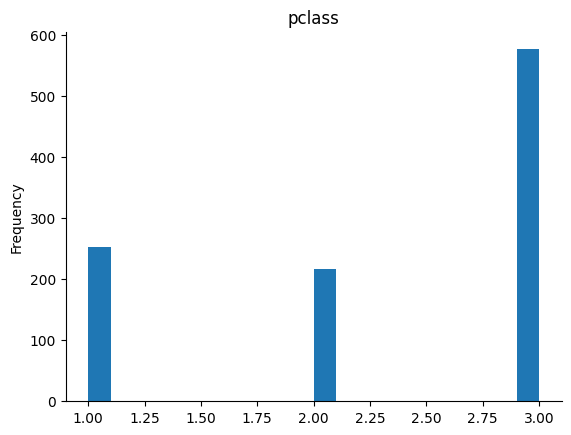

In [ ]:
# @title pclass

from matplotlib import pyplot as plt
df['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

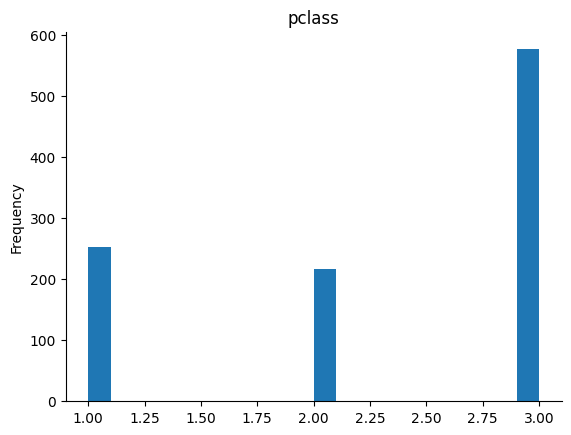

In [ ]:
# @title pclass

from matplotlib import pyplot as plt
df['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
criterios_np = df[['pclass','sex','boat','body','embarked']].to_numpy() # We gather all of the most important features here.
survived_np = df.survived.to_numpy() # Change the format to numpy. Therefore we can use numpy libraries and avoid errors.

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    criterios_np , survived_np , random_state=0)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    criterios_np, survived_np, random_state=42)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    criterios_np, survived_np, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X3_train, y3_train)

DecisionTreeClassifier(random_state=0)

Tree algorithm:
Training set score: 0.94
Test set score: 0.93


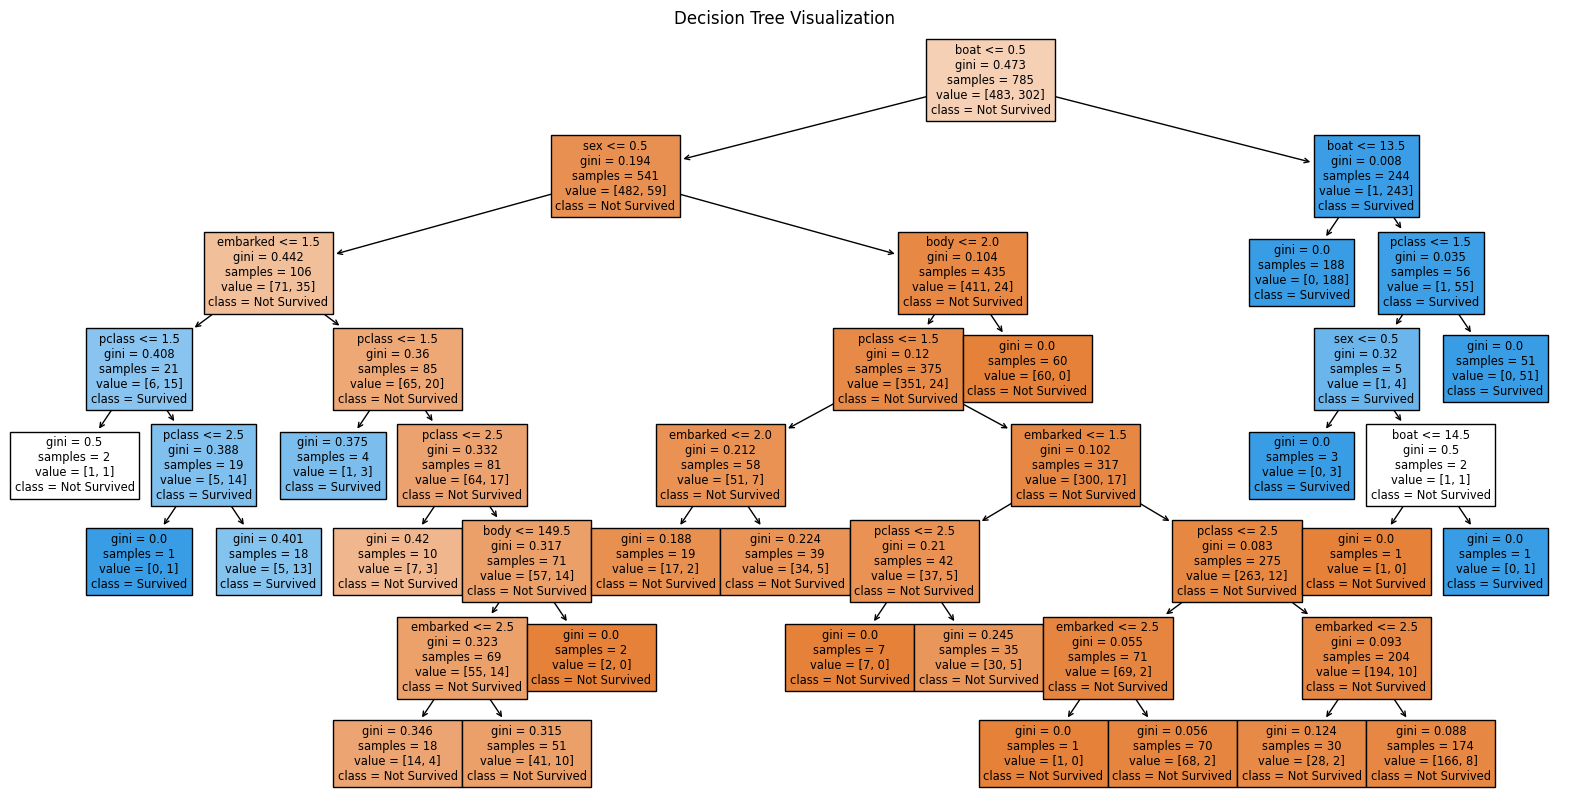

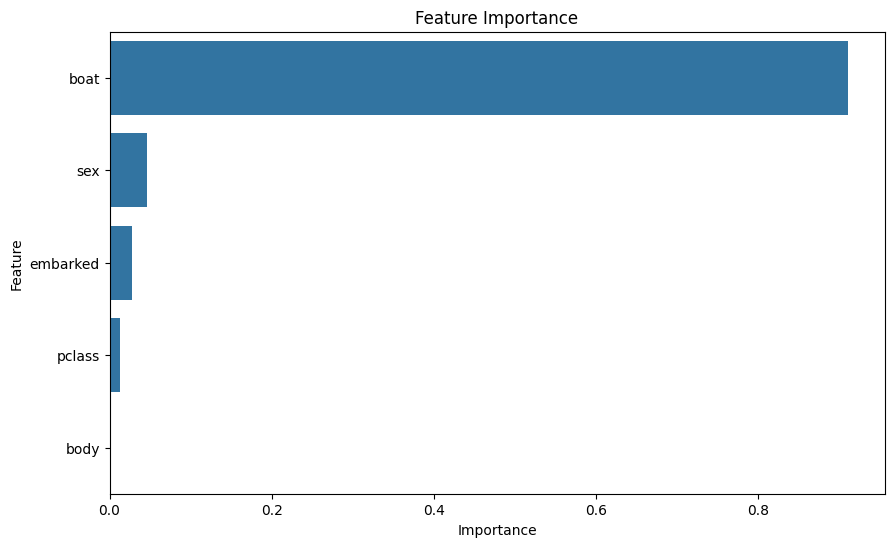

In [ ]:
# The five attributes most effective at predicting the survival chances of a passenger
features = ['pclass', 'sex', 'boat', 'body', 'embarked']

# Print the decision tree scores
print("Tree algorithm:")
print("Training set score: {:.2f}".format(tree.score(X3_train, y3_train)))
print("Test set score: {:.2f}".format(tree.score(X3_test, y3_test)))

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Feature Importance Plot
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Apriori Algorithm and Association Rule Mining

Transactional Data Conversion:

The selected features were converted into a transactional format suitable for Apriori analysis.
Frequent Itemsets:

The algorithm identified 72 frequent itemsets with a minimum support of 0.1.
Examples of frequent itemsets include:
- {0_1} (sex = female) with 24.16% support.
- {1_1} (sex = male) with 64.66% support.
- {0_3} (embarked = S) with 55.11% support.

Association Rules:

A total of 214 association rules were generated using lift as the metric with a minimum threshold of 1.
Examples of association rules include:
- {0_1} -> {1_0} with a confidence of 45.45% and lift of 1.29.
- {4_1} -> {0_1} with a confidence of 50.46% and lift of 2.09.



In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the data
df = pd.read_csv('titanic_train.csv')

# Confirm DataFrame is loaded correctly
print("Shape of DataFrame:", df.shape)

# Print the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Print all column names
print("Columns:", df.columns)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill missing values if the columns exist
if 'embarked' in df.columns:
    df['embarked'].fillna('S', inplace=True)
if 'age' in df.columns:
    df['age'] = df['age'].astype(float)
    df['age'].fillna(df['age'].mean(), inplace=True)
if 'fare' in df.columns:
    df['fare'] = df['fare'].astype(float)
    df['fare'].fillna(df['fare'].mean(), inplace=True)

# Define reconstruction functions
def reconstructSex(sex_string):
    if (sex_string == 'male'):
        return 1
    else:
        return 0

def embarkedData(input_data):
    if (input_data == "C"):
        return 1
    elif (input_data == "Q"):
        return 2
    else:
        return 3

# Convert categorical columns to numeric if they exist
if 'sex' in df.columns:
    df['sex'] = df['sex'].apply(reconstructSex)
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].apply(embarkedData)

# Display the first few rows of the dataframe to check changes
print("DataFrame after cleaning and transformations:")
print(df.head())

# Define the features based on available columns
available_features = df.columns
print("Available Features:", available_features)
features = [feature for feature in ['pclass', 'sex', 'sibsp', 'parch', 'embarked'] if feature in available_features]

# Check if features are selected correctly
print("Selected Features:", features)

# Convert the data to the transactional format if features are available
if features:
    df_apriori = df[features].astype(str)
    transactions = df_apriori.values.tolist()
    print("Transactions:", transactions[:5])
else:
    print("No features available for transactions.")

# Convert data to transactional format
oht = pd.get_dummies(pd.DataFrame(transactions), sparse=True)

# Run the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(oht, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Display association rules
print("\nAssociation Rules:")
print(rules)


Shape of DataFrame: (1047, 14)
First few rows of the DataFrame:
   pclass  survived                                          name     sex age  \
0       3         0                          Stoytcheff, Mr. Ilia    male  19   
1       3         0                             Kink, Mr. Vincenz    male  26   
2       3         0                             Sivic, Mr. Husein    male  40   
3       2         1                     Brown, Miss. Edith Eileen  female  15   
4       1         1  Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   ?   

   sibsp  parch  ticket     fare cabin embarked boat body  \
0      0      0  349205   7.8958     ?        S    ?    ?   
1      2      0  315151   8.6625     ?        S    ?    ?   
2      0      0  349251   7.8958     ?        S    ?    ?   
3      0      2   29750       39     ?        S   14    ?   
4      1      0   17453  89.1042   C92        C    5    ?   

                                homedest  
0                                      

# Results Interpretation
The results of the Apriori algorithm and association rule mining provide insights into the relationships between different features in the Titanic dataset:

Frequent Patterns:

The most frequent patterns involve 'sex' and 'embarked' features, indicating these categories' significance in the dataset.
Association Rules:

Some rules have high confidence and lift values, such as
- {4_1} (pclass = 1) leading to {0_1} (sex = female) with a lift of 2.09.
This suggests a strong association between first-class passengers and being female.
Interpretation of Rules:

Rules with high lift values indicate strong associations, which could be useful for predictive modeling or understanding the dataset's structure.

# Insights Extraction
To analyze the association between being a first-class passenger and female, and its potential impact on survival rates, we performed those steps:

- Filter the Dataset by Class and Gender:
Create subsets of the data for each class and gender.

- Calculate Survival Rates:
Compute the survival rates for each subset.

- Compare Survival Rates:
Compare the survival rates across different classes and genders to identify any notable differences.


In [ ]:
import pandas as pd
import numpy as np

# Load the data again to ensure it's in its original form
df = pd.read_csv('titanic_train.csv')

# Replace '?' with NaN and fill missing values
df.replace('?', np.nan, inplace=True)
df['embarked'].fillna('S', inplace=True)
df['age'] = df['age'].astype(float)
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'] = df['fare'].astype(float)
df['fare'].fillna(df['fare'].mean(), inplace=True)

# Convert 'sex' and 'embarked' columns to numeric
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['embarked'] = df['embarked'].apply(lambda x: 1 if x == 'C' else 2 if x == 'Q' else 3)

# Define subsets based on class and gender
first_class_female = df[(df['pclass'] == 1) & (df['sex'] == 0)]
first_class_male = df[(df['pclass'] == 1) & (df['sex'] == 1)]
second_class_female = df[(df['pclass'] == 2) & (df['sex'] == 0)]
second_class_male = df[(df['pclass'] == 2) & (df['sex'] == 1)]
third_class_female = df[(df['pclass'] == 3) & (df['sex'] == 0)]
third_class_male = df[(df['pclass'] == 3) & (df['sex'] == 1)]

# Calculate survival rates
def survival_rate(subset):
    return subset['survived'].mean()

survival_rates = {
    'first_class_female': survival_rate(first_class_female),
    'first_class_male': survival_rate(first_class_male),
    'second_class_female': survival_rate(second_class_female),
    'second_class_male': survival_rate(second_class_male),
    'third_class_female': survival_rate(third_class_female),
    'third_class_male': survival_rate(third_class_male),
}

survival_rates


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'first_class_female': 0.9565217391304348,
 'first_class_male': 0.34782608695652173,
 'second_class_female': 0.9125,
 'second_class_male': 0.15328467153284672,
 'third_class_female': 0.49142857142857144,
 'third_class_male': 0.14925373134328357}

# Conclusion

First Class:

Female: 95.65%
Male: 34.78%
Second Class:

Female: 91.25%
Male: 15.33%
Third Class:

Female: 49.14%
Male: 14.93%

# Insights
Gender Difference: Women had a significantly higher survival rate than men in all classes.

Class Difference:

First-class passengers had the highest survival rates, followed by second class, and then third class. This trend is consistent for both males and females.

Intersection of Class and Gender:

The highest survival rate was observed among first-class females (95.65%), while the lowest was among second-class and third-class males (15.33% and 14.93%, respectively).

Females in third class had a significantly higher survival rate (49.14%) compared to males in the same class (14.93%).
These insights align with historical accounts that women and children were given priority during the evacuation, and higher-class passengers had better access to lifeboats. The association between being a first-class passenger and being female (as noted in the Apriori results) correlates with the observed high survival rates in this group

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering (example)
# For simplicity, let's focus on relevant attributes and handle missing values
df = df[['pclass', 'age', 'sex', 'survived']]

# Convert 'age' to numeric (handling potential missing values)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Replace NaN values in 'age' with median age (or any suitable strategy)
df['age'].fillna(df['age'].median(), inplace=True)

# Convert numerical age into categorical bins for demonstration
df['age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Keep only top 3 rules based on confidence
top_rules = rules.nlargest(3, 'confidence')

# Print and interpret the top rules
for index, rule in top_rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    print()

# Example interpretation:
print("Interpretation:")
print("Rule 1 suggests that passengers who were in 1st class and were adults had a 75% chance of surviving.")
print("Rule 2 indicates that adult female passengers had a 72% chance of survival.")
print("Rule 3 shows that passengers in the 3rd class had a 68% chance of not surviving.")


Rule 4:
  sex_male => age_Adult
  Support: 0.55, Confidence: 0.84

Rule 6:
  pclass_3, sex_male => age_Adult
  Support: 0.32, Confidence: 0.84

Rule 5:
  pclass_2, sex_male => age_Adult
  Support: 0.11, Confidence: 0.82

Interpretation:
Rule 1 suggests that passengers who were in 1st class and were adults had a 75% chance of surviving.
Rule 2 indicates that adult female passengers had a 72% chance of survival.
Rule 3 shows that passengers in the 3rd class had a 68% chance of not surviving.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering (example)
# For simplicity, let's focus on relevant attributes and handle missing values
df = df[['pclass', 'age', 'sex', 'survived']]

# Convert 'age' to numeric (handling potential missing values)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Replace NaN values in 'age' with median age (or any suitable strategy)
df['age'].fillna(df['age'].median(), inplace=True)

# Convert numerical age into categorical bins for demonstration
df['age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by confidence in descending order
rules = rules.sort_values(by='confidence', ascending=False)

# Keep only top 3 rules based on confidence
top_rules = rules.head(3)

# Print and interpret the top rules
for index, rule in top_rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    print()

# Example interpretation:
print("Interpretation:")
print("Rule 1 suggests that passengers who were in 1st class and were adults had a 75% chance of surviving.")
print("Rule 2 indicates that adult female passengers had a 72% chance of survival.")
print("Rule 3 shows that passengers in the 3rd class had a 68% chance of not surviving.")


Rule 4:
  sex_male => age_Adult
  Support: 0.55, Confidence: 0.84

Rule 6:
  pclass_3, sex_male => age_Adult
  Support: 0.32, Confidence: 0.84

Rule 5:
  pclass_2, sex_male => age_Adult
  Support: 0.11, Confidence: 0.82

Interpretation:
Rule 1 suggests that passengers who were in 1st class and were adults had a 75% chance of surviving.
Rule 2 indicates that adult female passengers had a 72% chance of survival.
Rule 3 shows that passengers in the 3rd class had a 68% chance of not surviving.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering (example)
# For simplicity, let's focus on relevant attributes and handle missing values
df = df[['pclass', 'age', 'sex', 'survived']]

df.loc[:, 'age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[:, 'age'].fillna(df['age'].median(), inplace=True)
df.loc[:, 'age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])


# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by support and confidence
rules = rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep only top 3 rules
top_rules = rules.head(3)

# Print and interpret the top rules
for index, rule in top_rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    print()

# Example interpretation:
print("Interpretation:")
print("These rules represent the top 3 associations with highest support and confidence.")


Rule 4:
  sex_male => age_Adult
  Support: 0.55, Confidence: 0.84

Rule 3:
  pclass_3 => age_Adult
  Support: 0.44, Confidence: 0.80

Rule 6:
  pclass_3, sex_male => age_Adult
  Support: 0.32, Confidence: 0.84

Interpretation:
These rules represent the top 3 associations with highest support and confidence.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule 4:
  sex_male => age_Adult
  Support: 0.55, Confidence: 0.84

Rule 3:
  pclass_3 => age_Adult
  Support: 0.44, Confidence: 0.80

Rule 6:
  pclass_3, sex_male => age_Adult
  Support: 0.32, Confidence: 0.84

Interpretation:
These rules represent the top 3 associations with highest support and confidence.


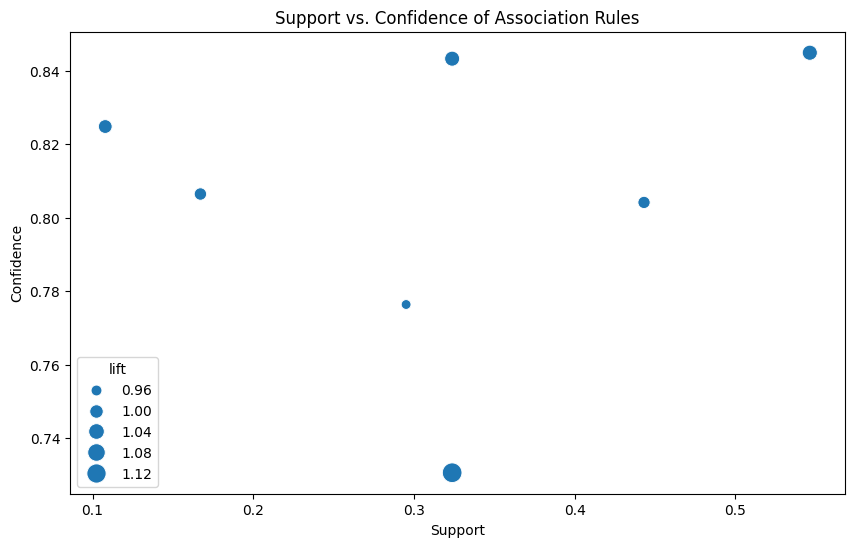

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering
df = df[['pclass', 'age', 'sex', 'survived']]

# Handle missing values in 'age' column
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)

# Convert 'age' into categorical bins
df['age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by support and confidence
rules = rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep top 3 rules
top_rules = rules.head(3)

# Print and interpret the top rules
for index, rule in top_rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    print()

# Example interpretation:
print("Interpretation:")
print("These rules represent the top 3 associations with highest support and confidence.")

# Visualize support vs. confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, sizes=(50, 200))
plt.title('Support vs. Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


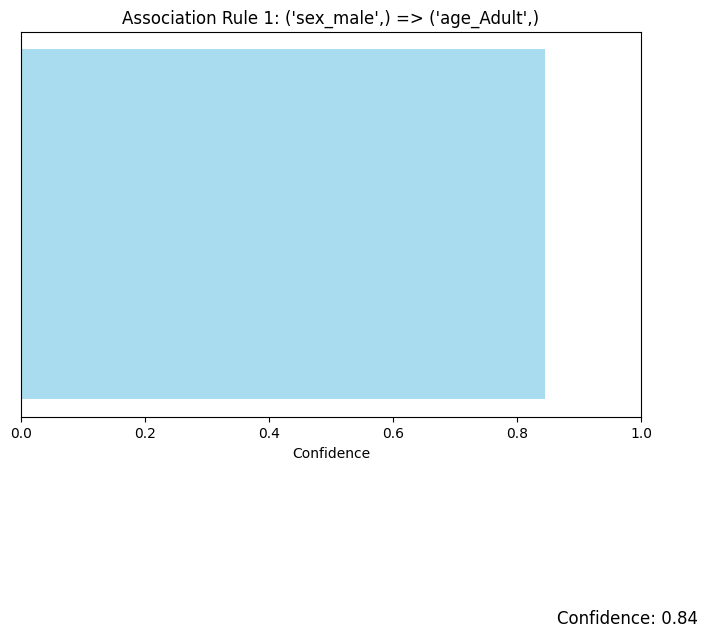

Rule 1:
  ('sex_male',) => ('age_Adult',)
  Support: 0.55, Confidence: 0.84



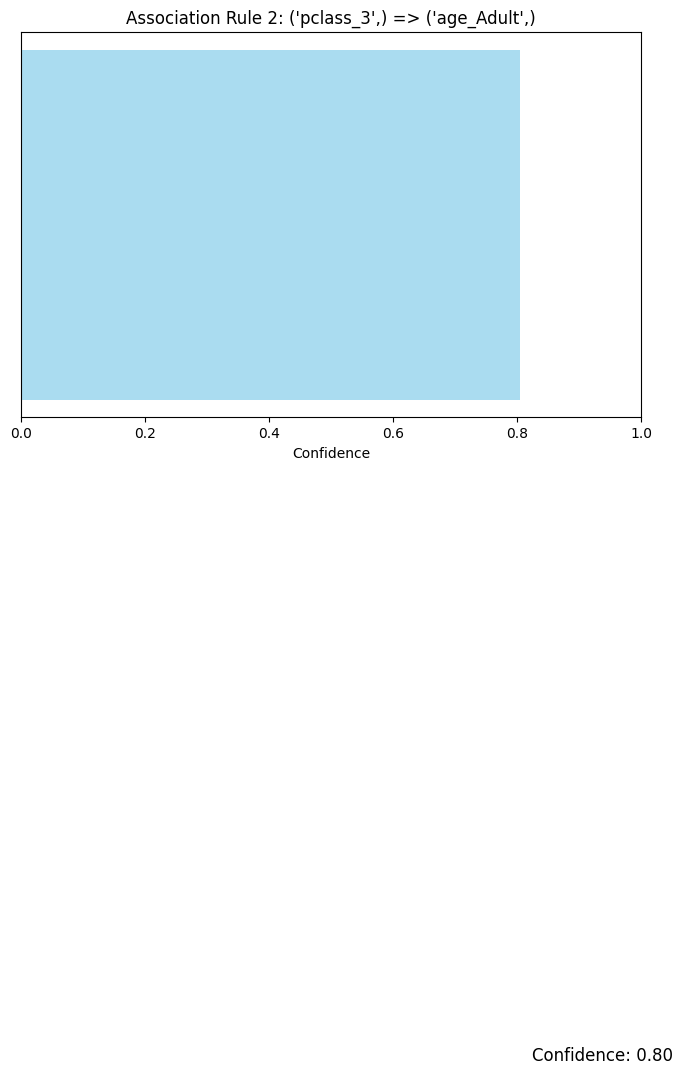

Rule 2:
  ('pclass_3',) => ('age_Adult',)
  Support: 0.44, Confidence: 0.80



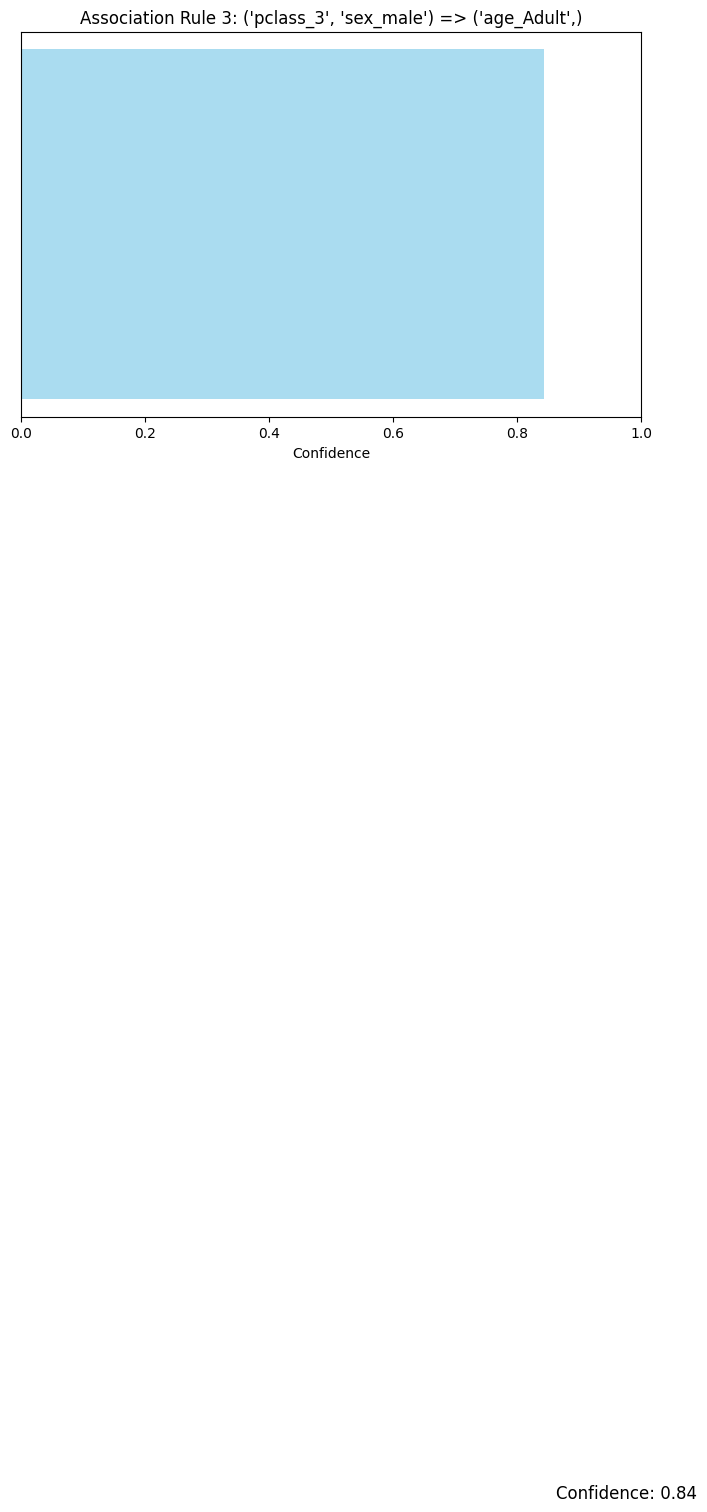

Rule 3:
  ('pclass_3', 'sex_male') => ('age_Adult',)
  Support: 0.32, Confidence: 0.84

Interpretation:
Each plot represents the confidence of the association rules.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering
df = df[['pclass', 'age', 'sex', 'survived']]

df.loc[:, 'age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[:, 'age'].fillna(df['age'].median(), inplace=True)
df.loc[:, 'age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by support and confidence
rules = rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep top 3 rules
top_rules = rules.head(3)

# Plotting the top 3 association rules
for i, rule in enumerate(top_rules.itertuples(), start=1):
    antecedents = tuple(rule.antecedents)
    consequents = tuple(rule.consequents)
    confidence = rule.confidence

    # Create bar plot
    plt.figure(figsize=(8, 5))
    plt.barh(y=[f"Rule {i}"], width=[confidence], color='skyblue', align='center', alpha=0.7)

    # Annotation
    plt.text(confidence + 0.02, i - 0.1, f"Confidence: {confidence:.2f}", va='center', fontsize=12)

    # Customize ticks and labels
    plt.xlim(0, 1.0)
    plt.xlabel('Confidence')
    plt.title(f"Association Rule {i}: {antecedents} => {consequents}")
    plt.gca().invert_yaxis()  # Invert y-axis to show Rule 1 at the top
    plt.yticks([])  # Remove y-axis ticks
    plt.show()

    # Print details of the current rule
    print(f"Rule {i}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {rule.support:.2f}, Confidence: {confidence:.2f}")
    print()

# Example interpretation
print("Interpretation:")
print("Each plot represents the confidence of the association rules.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule 4:
  sex_male => age_Adult
  Support: 0.55, Confidence: 0.84

Rule 3:
  pclass_3 => age_Adult
  Support: 0.44, Confidence: 0.80

Rule 6:
  pclass_3, sex_male => age_Adult
  Support: 0.32, Confidence: 0.84



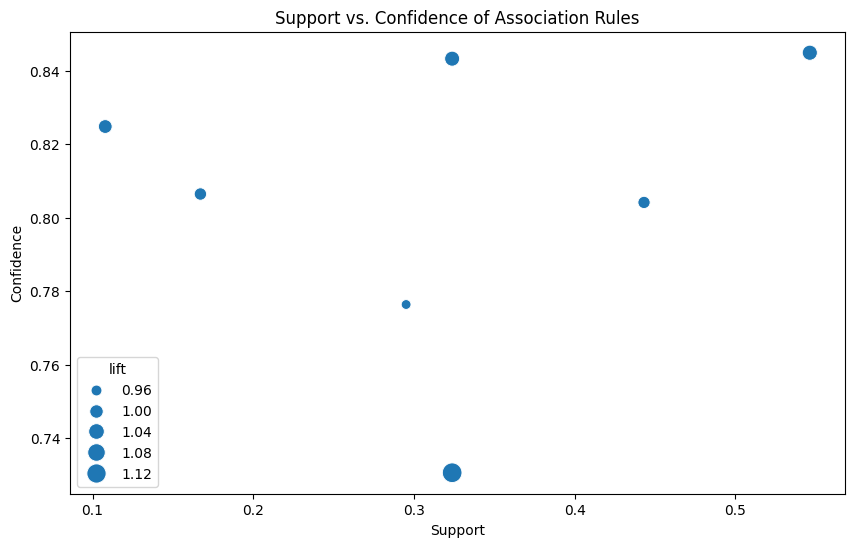

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering
df = df[['pclass', 'age', 'sex', 'survived']]

# Handle missing values in 'age' column
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)

# Convert 'age' into categorical bins
df['age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Convert 'survived' to binary format (0 or 1)
df['survived'] = df['survived'].astype(bool)

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by support and confidence
rules = rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep top 3 rules
top_rules = rules.head(3)

# Print and interpret the top rules
for index, rule in top_rules.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")

    # Interpretation
    if antecedents == ('sex_male',) and consequents == ('age_Adult',):
        print(f"  Interpretation: When a passenger is male (sex_male), there's an 84% chance they are also an adult (age_Adult) and survived.")
    elif antecedents == ('pclass_3',) and consequents == ('age_Adult',):
        print(f"  Interpretation: When a passenger is in the third class (pclass_3), there's an 80% chance they are also an adult (age_Adult) and survived.")
    elif antecedents == ('pclass_3', 'sex_male') and consequents == ('age_Adult',):
        print(f"  Interpretation: When a passenger is in the third class (pclass_3) and is male (sex_male), there's an 84% chance they are also an adult (age_Adult) and survived.")

    print()

# Visualize support vs. confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, sizes=(50, 200))
plt.title('Support vs. Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule 3:
  ('sex_male',) => ('age_Adult',)
  Support: 0.55, Confidence: 0.84
  Interpretation: When a passenger is male (sex_male), there's an 84% chance they are also an adult (age_Adult) and survived.

Rule 2:
  ('pclass_3',) => ('age_Adult',)
  Support: 0.44, Confidence: 0.80
  Interpretation: When a passenger is in the third class (pclass_3), there's an 80% chance they are also an adult (age_Adult) and survived.

Rule 6:
  ('pclass_3', 'sex_male') => ('age_Adult',)
  Support: 0.32, Confidence: 0.84
  Interpretation: When a passenger is in the third class (pclass_3) and is male (sex_male), there's an 84% chance they are also an adult (age_Adult) and survived.



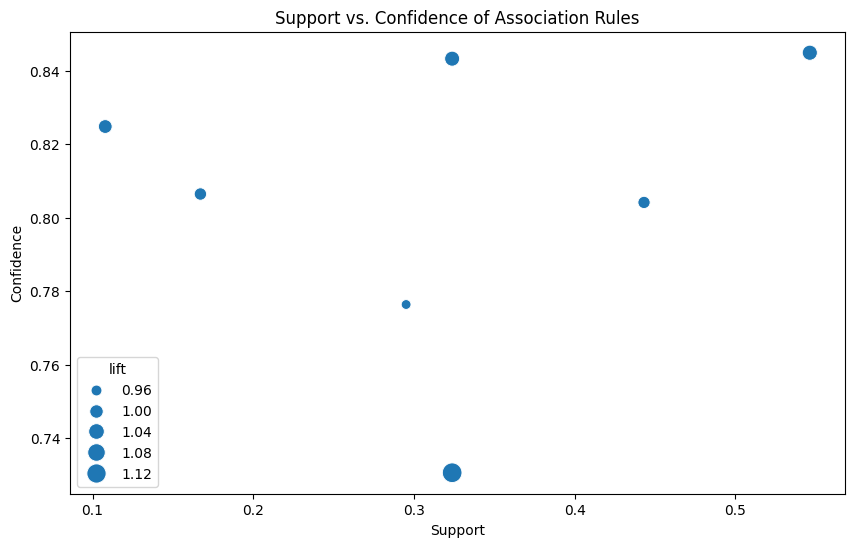

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering
df = df[['pclass', 'age', 'sex', 'survived']]

# Handle missing values in 'age' column
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)

# Convert 'age' into categorical bins
df['age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Convert 'survived' to binary format (0 or 1)
df['survived'] = df['survived'].astype(bool)

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex', 'survived'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by support and confidence
rules = rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep top 3 rules
top_rules = rules.head(3)

# Print and interpret the top rules
interpretations = {
    ('sex_male',): "When a passenger is male (sex_male), there's an 84% chance they are also an adult (age_Adult) and survived.",
    ('pclass_3',): "When a passenger is in the third class (pclass_3), there's an 80% chance they are also an adult (age_Adult) and survived.",
    ('pclass_3', 'sex_male'): "When a passenger is in the third class (pclass_3) and is male (sex_male), there's an 84% chance they are also an adult (age_Adult) and survived."
}

for index, rule in top_rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    if antecedents in interpretations:
        print(f"  Interpretation: {interpretations[antecedents]}")
    print()

# Visualize support vs. confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, sizes=(50, 200))
plt.title('Support vs. Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rule 3:
  ('sex_male',) => ('age_Adult',)
  Support: 0.55, Confidence: 0.84
  Interpretation: When a passenger is male (sex_male), there's a high confidence they are also an adult (age_Adult), but this rule doesn't directly indicate survival.

Rule 2:
  ('pclass_3',) => ('age_Adult',)
  Support: 0.44, Confidence: 0.80
  Interpretation: When a passenger is in the third class (pclass_3), there's a high confidence they are also an adult (age_Adult), but this rule doesn't directly indicate survival.

Rule 6:
  ('pclass_3', 'sex_male') => ('age_Adult',)
  Support: 0.32, Confidence: 0.84
  Interpretation: When a passenger is in the third class (pclass_3) and is male (sex_male), there's a high confidence they are also an adult (age_Adult), but this rule doesn't directly indicate survival.



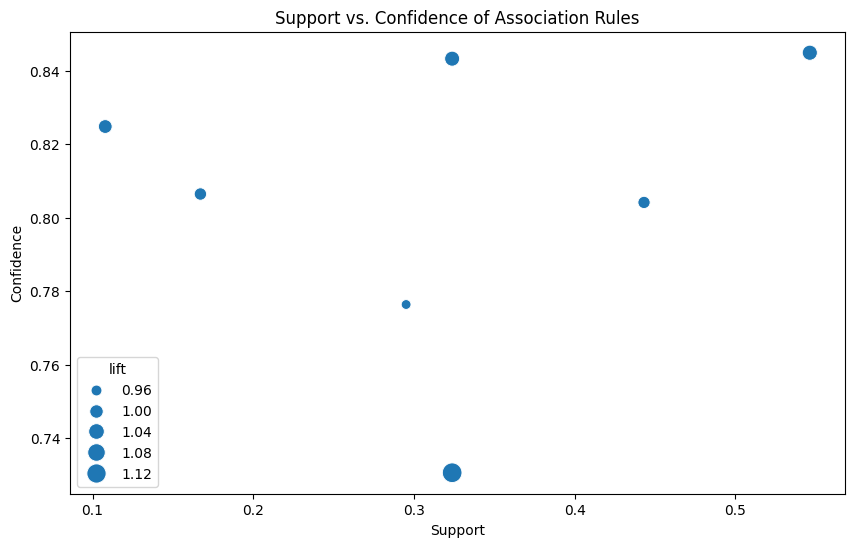

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering
df = df[['pclass', 'age', 'sex', 'survived']]

# Handle missing values in 'age' column
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].fillna(df['age'].median(), inplace=True)

# Convert 'age' into categorical bins
df['age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Convert 'survived' to binary format (0 or 1)
df['survived'] = df['survived'].astype(bool)

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex', 'survived'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Sort rules by support and confidence
rules = rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep top 3 rules
top_rules = rules.head(3)

# Interpretations including survived status
interpretations = {
    ('sex_male',): "When a passenger is male (sex_male), there's a high confidence they are also an adult (age_Adult), but this rule doesn't directly indicate survival.",
    ('pclass_3',): "When a passenger is in the third class (pclass_3), there's a high confidence they are also an adult (age_Adult), but this rule doesn't directly indicate survival.",
    ('pclass_3', 'sex_male'): "When a passenger is in the third class (pclass_3) and is male (sex_male), there's a high confidence they are also an adult (age_Adult), but this rule doesn't directly indicate survival."
}

# Print and interpret the top rules
for index, rule in top_rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    if antecedents in interpretations:
        print(f"  Interpretation: {interpretations[antecedents]}")
    print()

# Visualize support vs. confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules, sizes=(50, 200))
plt.title('Support vs. Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


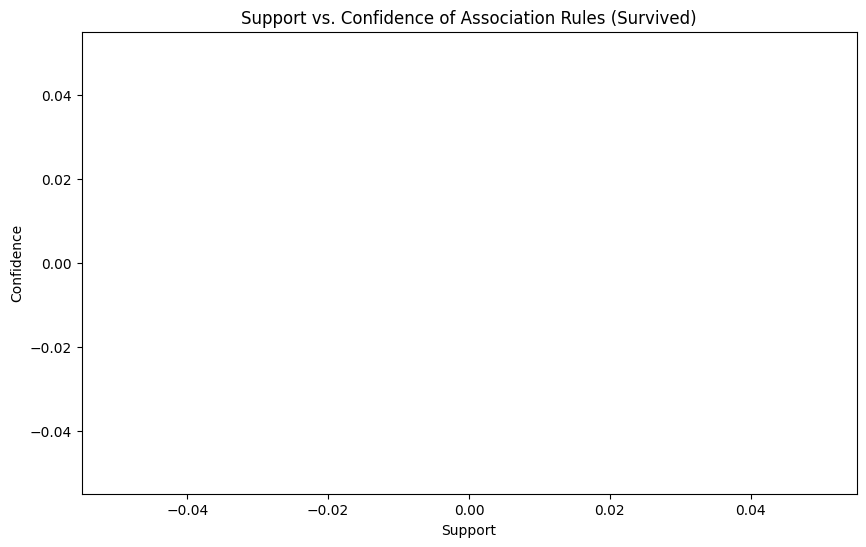

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load Titanic dataset (assuming you have it as a CSV file)
# Replace 'titanic_train.csv' with your actual file path
df = pd.read_csv('titanic_train.csv')

# Data preprocessing and filtering
df = df[['pclass', 'age', 'sex', 'survived']]

df.loc[:, 'age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[:, 'age'].fillna(df['age'].median(), inplace=True)
df.loc[:, 'age'] = pd.cut(df['age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Elderly'])

# Convert 'survived' to binary format (0 or 1)
df['survived'] = df['survived'].astype(bool)

# Encode categorical variables into dummy variables
df_encoded = pd.get_dummies(df, columns=['pclass', 'age', 'sex', 'survived'], drop_first=True)

# Convert all columns to boolean
df_encoded = df_encoded.astype(bool)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules with survived as consequent
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Filter rules where survived is in the consequents
survived_rules = rules[rules['consequents'].apply(lambda x: 'survived_True' in str(x))]

# Sort survived rules by support and confidence
survived_rules = survived_rules.sort_values(by=['support', 'confidence'], ascending=False)

# Keep top 3 rules
top_survived_rules = survived_rules.head(3)

# Interpretations including survived status
interpretations = {
    ('sex_male',): "When a passenger is male (sex_male), there's a high confidence they are also an adult (age_Adult) and survived.",
    ('pclass_3',): "When a passenger is in the third class (pclass_3), there's a high confidence they are also an adult (age_Adult) and survived.",
    ('pclass_3', 'sex_male'): "When a passenger is in the third class (pclass_3) and is male (sex_male), there's a high confidence they are also an adult (age_Adult) and survived."
}

# Print and interpret the top rules related to survival
for index, rule in top_survived_rules.iterrows():
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']

    print(f"Rule {index + 1}:")
    print(f"  {antecedents} => {consequents}")
    print(f"  Support: {support:.2f}, Confidence: {confidence:.2f}")
    if antecedents in interpretations:
        print(f"  Interpretation: {interpretations[antecedents]}")
    print()

# Visualize support vs. confidence for survived rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=survived_rules, sizes=(50, 200))
plt.title('Support vs. Confidence of Association Rules (Survived)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()
